In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error
warnings.filterwarnings("ignore")

In [78]:
df = pd.read_csv("dataset_cuaca_perjam.csv")

In [79]:
df

,YEAR-MONTH-DAY,YEAR,MONTH,DAY,HOUR,T2M,RH2M,PS,WS10M
0,11/30/2013,2013.0,11.0,30.0,7:00:00,27.36,78.94,100.80,3.17
1,11/30/2013,2013.0,11.0,30.0,8:00:00,28.47,73.19,100.85,2.65
2,11/30/2013,2013.0,11.0,30.0,9:00:00,29.44,69.56,100.83,2.04
3,11/30/2013,2013.0,11.0,30.0,10:00:00,30.12,67.38,100.77,1.73
4,11/30/2013,2013.0,11.0,30.0,11:00:00,30.44,66.38,100.70,1.87
...,...,...,...,...,...,...,...,...,...
1048570,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
df.describe()

,YEAR,MONTH,DAY,T2M,RH2M,PS,WS10M
count,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000
mean,2018.414157,6.524854,15.729412,27.466713,81.585563,100.829341,2.976495
std,2.886282,3.448991,8.801398,1.591940,8.568729,0.170545,1.322424
min,2013.000000,1.000000,1.000000,22.150000,41.310000,100.220000,0.010000
25%,2016.000000,4.000000,8.000000,26.290000,76.560000,100.710000,2.040000
50%,2018.000000,7.000000,16.000000,27.220000,83.810000,100.830000,2.900000
75%,2021.000000,10.000000,23.000000,28.600000,88.310000,100.950000,3.770000
max,2023.000000,12.000000,31.000000,34.150000,96.690000,101.440000,9.100000


In [81]:
# import matplotlib.pyplot as plt
# # plt.bar(df['PS'], height=0.8)

## PREPROCESSING

In [82]:
df.dropna(inplace=True)

In [83]:
df = df.drop(columns=['YEAR', 'MONTH', 'DAY'], axis=1)

In [84]:
df.isnull().sum()

YEAR-MONTH-DAY    0
HOUR              0
T2M               0
RH2M              0
PS                0
WS10M             0
dtype: int64

In [85]:
df.dtypes

YEAR-MONTH-DAY     object
HOUR               object
T2M               float64
RH2M              float64
PS                float64
WS10M             float64
dtype: object

In [86]:
df['YEAR-MONTH-DAY'] = pd.to_datetime(df['YEAR-MONTH-DAY'])
df['HOUR'] = pd.to_timedelta(df['HOUR'])
df['TIME'] = df['YEAR-MONTH-DAY'] + df['HOUR']

In [87]:
del df['YEAR-MONTH-DAY']
del df['HOUR']

In [88]:
df.dtypes

T2M             float64
RH2M            float64
PS              float64
WS10M           float64
TIME     datetime64[ns]
dtype: object

In [89]:
df.set_index(df['TIME'], inplace = True)

In [90]:
# df['T_target'] = df.shift(-1)['T2M']
# df['RH_target'] = df.shift(-1)['RH2M']
# df['PS_target'] = df.shift(-1)['PS']
# df['WS_target'] = df.shift(-1)['WS10M']

In [91]:
df.head()

,T2M,RH2M,PS,WS10M,TIME
TIME,,,,,
2013-11-30 07:00:00,27.36,78.94,100.80,3.17,2013-11-30 07:00:00
2013-11-30 08:00:00,28.47,73.19,100.85,2.65,2013-11-30 08:00:00
2013-11-30 09:00:00,29.44,69.56,100.83,2.04,2013-11-30 09:00:00
2013-11-30 10:00:00,30.12,67.38,100.77,1.73,2013-11-30 10:00:00
2013-11-30 11:00:00,30.44,66.38,100.70,1.87,2013-11-30 11:00:00


In [92]:
df.dropna(inplace=True)

In [93]:
# df.sort_index(inplace=True)

# start_date = '2021-04-01 09:00:00'
# end_date = '2022-05-01 16:00:00'


In [94]:
del df['TIME']
del df['T2M']
del df['PS']
del df['RH2M']

In [95]:
# df.sort_index(inplace=True)
# data_range = df.loc['2023-11-01 09:00:00':'2023-12-01 09:00:00']

In [96]:
# df['2021':'2022'].plot(subplots=True, figsize=(20,12))

In [97]:
# data_range['RH2M'].plot()

## SPLITTING DATA

In [98]:
# df = df['2022':]

In [99]:
df = df.sort_index()

train_percentage = 0.8
train_size = int(len(df) * train_percentage)

# train_data = df[:train_size].resample('M').mean()
# test_data = df[train_size:].resample('M').mean()

train_data = df[:train_size]
test_data = df[train_size:]

In [100]:
# train_df = weather_df['2000':'2015'].resample('M').mean()
# train_df = train_df.fillna(train_df.mean())
# test_df = weather_df['2016':'2017'].resample('M').mean()
# test_df = test_df.fillna(test_df.mean())

In [101]:

# def plot_rolling_mean_std(ts):
#     rolling_mean = ts.rolling(12).mean()
#     rolling_std = ts.rolling(12).std()
#     plt.figure(figsize=(10,5))

#     plt.plot(ts, label='Actual Mean')
#     plt.plot(rolling_mean, label='Rolling Mean')
#     plt.plot(rolling_std, label = 'Rolling Std')
#     plt.xlabel("Date")
#     plt.ylabel("Mean Humidity")
#     plt.title('Rolling Mean & Rolling Standard Deviation')
#     plt.legend()
#     plt.show()

In [102]:
# plot_rolling_mean_std(train_data.RH2M)

In [103]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# result = seasonal_decompose(df.index, model="multiplicative", period=30)
# fig = plt.figure()
# fig = result.plot()

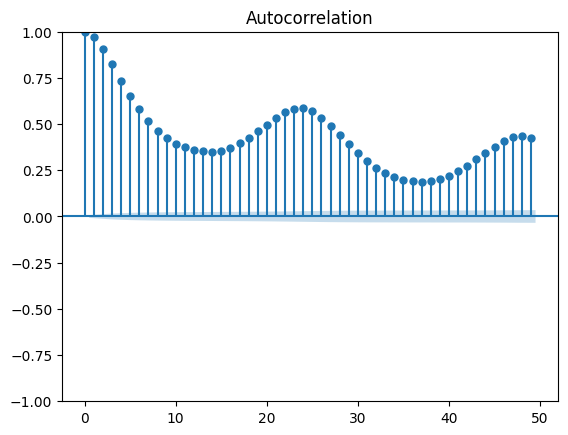

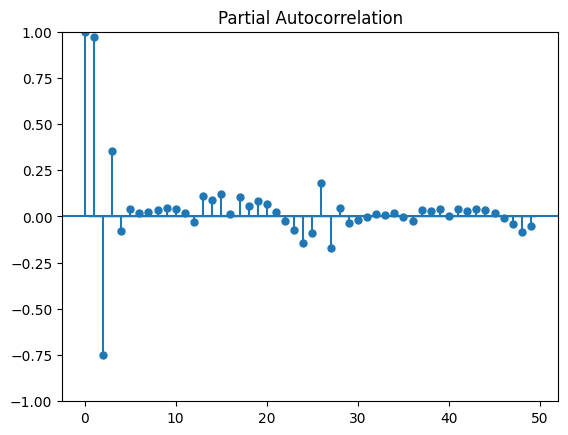

In [104]:


acf_original = plot_acf(train_data)
pacf_original = plot_pacf(train_data)

In [105]:

adf_test = adfuller(train_data)
print(f'p-value: {adf_test[1]}')

p-value: 2.0326037802404642e-30


In [106]:
# #ARIMA model
# import statsmodels.api as smapi
# from statsmodels.tsa.arima.model import ARIMA

# p=4
# d=0
# q=0
# model = ARIMA(train_data.T2M, order=(p,d,q))
# model_fit = model.fit()
# print(model_fit.summary())

In [107]:
p = 1  
d = 0  
q = 0  


model_sarima = sm.tsa.ARIMA(train_data, order=(p, d, q))
model_fit_sarima = model_sarima.fit()
print(model_fit_sarima.summary())

                               SARIMAX Results                                
Dep. Variable:                  WS10M   No. Observations:                70137
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -16769.020
Date:                Thu, 11 Jul 2024   AIC                          33544.039
Time:                        01:55:28   BIC                          33571.514
Sample:                    11-30-2013   HQIC                         33552.512
                         - 11-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0051      0.044     69.077      0.000       2.920       3.090
ar.L1          0.9731      0.001   1257.305      0.000       0.972       0.975
sigma2         0.0944      0.000    249.915      0.0

In [108]:
# #SARIMA model
# p=4
# d=0
# q=5
# model = smapi.tsa.statespace.SARIMAX(train_data.T2M, order=(p,d,q), seasonal_order=(p,d,q,12))
# model_fit = model.fit()
# print(model_fit.summary())

In [109]:
# # Plot residual errors
# plt.rcParams.update({'figure.figsize':(12,3), 'figure.dpi':120})
# residuals = pd.DataFrame(model_fit_sarima.resid)
# residuals.columns = ['Residuals']
# fig, ax = plt.subplots(1,2)
# residuals.plot(title="Residuals", ax=ax[0])
# residuals.plot(kind='kde', title='Density', ax=ax[1])
# plt.show()

In [110]:
# acf_res = plot_acf(model_fit_sarima.resid)
# pacf_res = plot_pacf(model_fit_sarima.resid)

In [111]:

# stats.probplot(model_fit_sarima.resid, dist="norm", plot=plt)
# plt.title('Q-Q Plot of Residuals')
# plt.show()

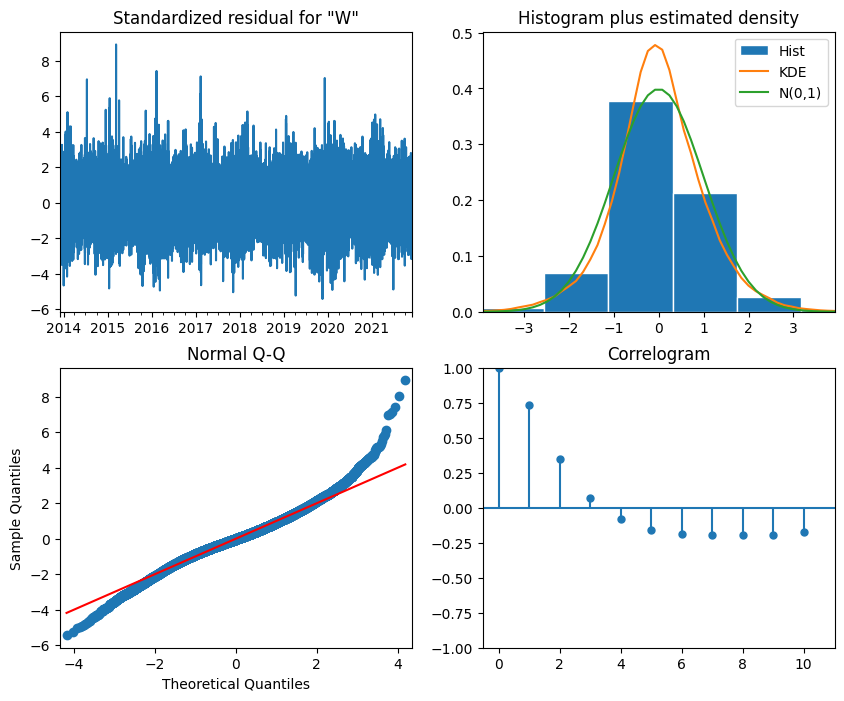

In [112]:
model_fit_sarima.plot_diagnostics(figsize=(10,8))
plt.show()

In [113]:


# # Make predictions
# forecast = model_fit_sarima.predict(train_data)

In [114]:
# fig, ax = plt.subplots()
# ax = df.loc['2023':].plot(ax=ax)
# plot_predict(model_fit_sarima, ax=ax)
# plt.show()

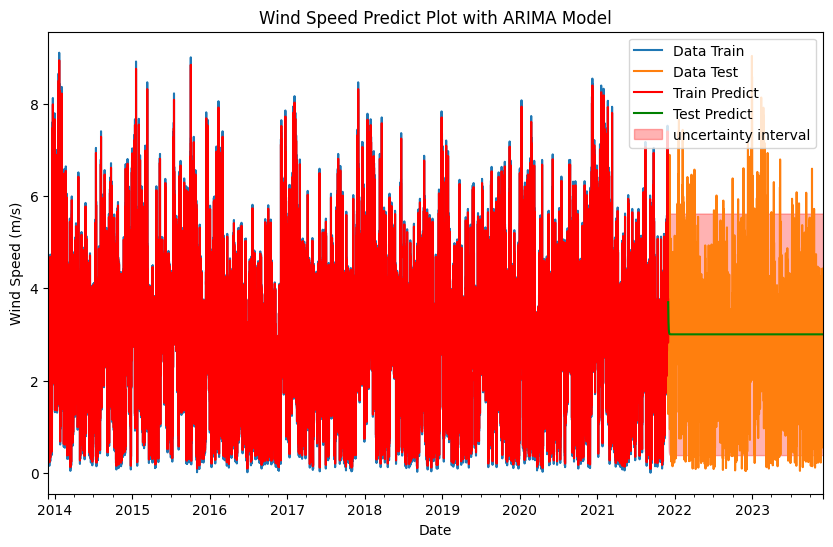

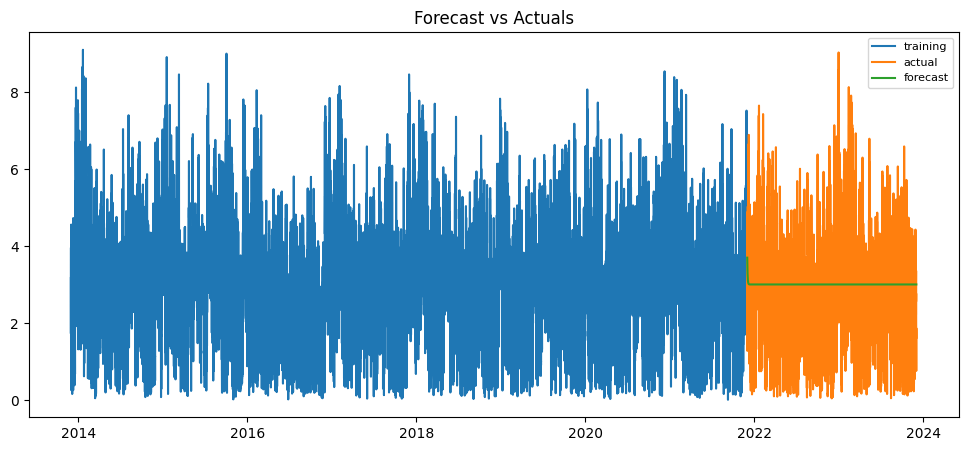

In [115]:
# # Forecast values for test_df

fc = model_fit_sarima.predict(len(train_data), len(train_data)+len(test_data)-1) 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Forecast on test data
forecast_test = model_fit_sarima.get_forecast(steps=len(test_data))
forecast_mean_test = forecast_test.predicted_mean

# Forecast on train data using predict method
forecast_mean_train = model_fit_sarima.predict(start=train_data.index[0], end=train_data.index[-1])

# Confidence interval
forecast_ci = forecast_test.conf_int()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot observed data
train_data['WS10M'].plot(ax=ax, label='Data Train', linestyle='-')
test_data['WS10M'].plot(ax=ax, label='Data Test', linestyle='-')

# Plot forecasts
forecast_mean_train.plot(ax=ax, label='Train Predict', color='red', linestyle='-')
forecast_mean_test.plot(ax=ax, label='Test Predict', color='green', linestyle='-')

# Plot confidence intervals
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='r', alpha=0.3, label='uncertainty interval')

# Add error metrics
# plt.text(0.5, 0.01, f'MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}', transform=ax.transAxes,
#          fontsize=12, verticalalignment='bottom', horizontalalignment='center',
#          bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

# Set labels and legends
ax.set_xlabel('Date')
ax.set_ylabel('Wind Speed (m/s)')
plt.title('Wind Speed Predict Plot with ARIMA Model')
plt.legend()
plt.show()

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper right', fontsize=8)
plt.show()

In [116]:
forecast_mean_test.describe()

count    17535.000000
mean         3.006586
std          0.022750
min          3.005112
25%          3.005112
50%          3.005112
75%          3.005112
max          3.700759
Name: predicted_mean, dtype: float64

In [117]:
fc.describe()

count    17535.000000
mean         3.006586
std          0.022750
min          3.005112
25%          3.005112
50%          3.005112
75%          3.005112
max          3.700759
Name: predicted_mean, dtype: float64

In [118]:
import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

mae = mean_absolute_error(test_data, fc)
mse = mean_squared_error(test_data, fc)
rmse = np.sqrt(mse)

print(f'mae: {mae}')
print(f'mape: {rmse}')
print(f'mse: {mse}')

mae: 1.030003714481824
mape: 1.2785038304290415
mse: 1.634572044421731


In [119]:
# df.reset_index(inplace = True)

In [120]:
# from sklearn.model_selection import TimeSeriesSplit

# tscv = TimeSeriesSplit(n_splits=15)
# for train_index, test_index in tscv.split(df):
#     train_data = df.iloc[train_index]
#     test_data = df.iloc[test_index]

In [121]:
# train_data = df.iloc[:800]
# test_data = df.iloc[-400:]

In [122]:
# df_train = df_train[['TIME', 'RH2M']]
# df_test = df_test[['TIME', 'T2M']]

In [123]:
# df.reset_index(inplace = True)

In [124]:
# df.iloc[:, 0]

In [125]:
# from sklearn.model_selection import train_test_split
# data_train, data_test = df.iloc[:, 0].values, df.iloc[:, 1].values

In [126]:
# data_train, data_test = train_test_split(data_train, data_test, test_size=0.2, random_state=42)

In [127]:
# print("shape of original dataset :", df.shape)
# print("shape of input - training set", X_train.shape)
# print("shape of output - training set", y_train.shape)
# print("shape of input - testing set", X_test.shape)
# print("shape of output - testing set", y_test.shape)

In [128]:
# df.index = df.index.astype('int64')

In [129]:
# msk = (df.index < len(df)-30)
# df_train = df[msk].copy()
# df_test = df[~msk].copy()

In [130]:
# df_train = df_train[['TIME','T2M']]
# df_train.values

# --------------------------------------------------------------------------------------------

In [131]:
# df = df.sort_index()

# train_percentage = 0.8
# train_size = int(len(df) * train_percentage)

# train_data = df[:train_size]
# test_data = df[train_size:]

In [132]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# acf_original = plot_acf(train_data)
# pacf_original = plot_pacf(train_data)

In [133]:
# from statsmodels.tsa.stattools import adfuller
# adf_test = adfuller(train_data)
# print(f'p-value: {adf_test[1]}')

In [134]:
# df_train_diff = train_data.diff().dropna()
# df_train_diff.plot()

In [135]:
# acf_diff = plot_acf(df_train_diff)
# pacf_diff = plot_pacf(df_train_diff)

In [136]:
# adf_test = adfuller(df_train_diff)
# print(f'p-value: {adf_test[1]}')

In [137]:
# from statsmodels.tsa.arima.model import ARIMA
# import warnings
# warnings.filterwarnings("ignore")

# model = ARIMA(train_data, order=(1,1,3))
# model_fit = model.fit()
# print(model_fit.summary())

In [138]:
# import matplotlib.pyplot as plt
# residuals = model_fit.resid[1:]
# fig, ax = plt.subplots(1,2)
# residuals.plot(title='Residuals', ax=ax[0])
# residuals.plot(title='Density', kind='kde', ax=ax[1])
# plt.show()

In [139]:
# acf_res = plot_acf(residuals)
# pacf_res = plot_pacf(residuals)

In [140]:
# forecast_test = model_fit.forecast(len(test_data))

# df['forecast'] = [None]*len(train_data) + list(forecast_test)

# df.plot()

In [141]:
# from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# mae = mean_absolute_error(test_data, forecast_test)
# mape = mean_absolute_percentage_error(test_data, forecast_test)
# rmse = np.sqrt(mean_squared_error(test_data, forecast_test))

# print(f'mae - manual: {mae}')
# print(f'mape - manual: {mape}')
# print(f'rmse - manual: {rmse}')

In [142]:
# df

### AUTO ARIMA

In [143]:
# import pmdarima as pm
# model_auto = pm.auto_arima(train_data, stepwise=False, seasonal=False)
# model_auto

In [144]:
# from pmdarima.arima import auto_arima

# model_auto = auto_arima(train_data, start_p=1, start_q=1,
#                       test='adf',
#                       max_p=5, max_q=5,
#                       m=1,             
#                       d=1,          
#                       seasonal=False,   
#                       start_P=0, 
#                       D=None, 
#                       trace=True,
#                       error_action='ignore',  
#                       suppress_warnings=True, 
#                       stepwise=True)

In [145]:
# model_auto

In [146]:
# model_auto.summary()

In [147]:
# forecast_test_auto = model_auto.predict(n_periods=len(test_data))
# df['forecast_auto'] = [None]*len(train_data) + list(forecast_test_auto)

# df.plot()

In [148]:
# df

In [149]:
# mae = mean_absolute_error(test_data, forecast_test_auto)
# mape = mean_absolute_percentage_error(test_data, forecast_test_auto)
# rmse = np.sqrt(mean_squared_error(test_data, forecast_test_auto))

# print(f'mae - auto: {mae}')
# print(f'mape - auto: {mape}')
# print(f'rmse - auto: {rmse}')

In [150]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# df.dropna()